# Data Analysis

# 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read Data

In [3]:
from pathlib import Path
import os

# Load the data
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

dataset = "./AnimalRecognition_Data"
image_df_italian = convert_path_to_df(dataset)

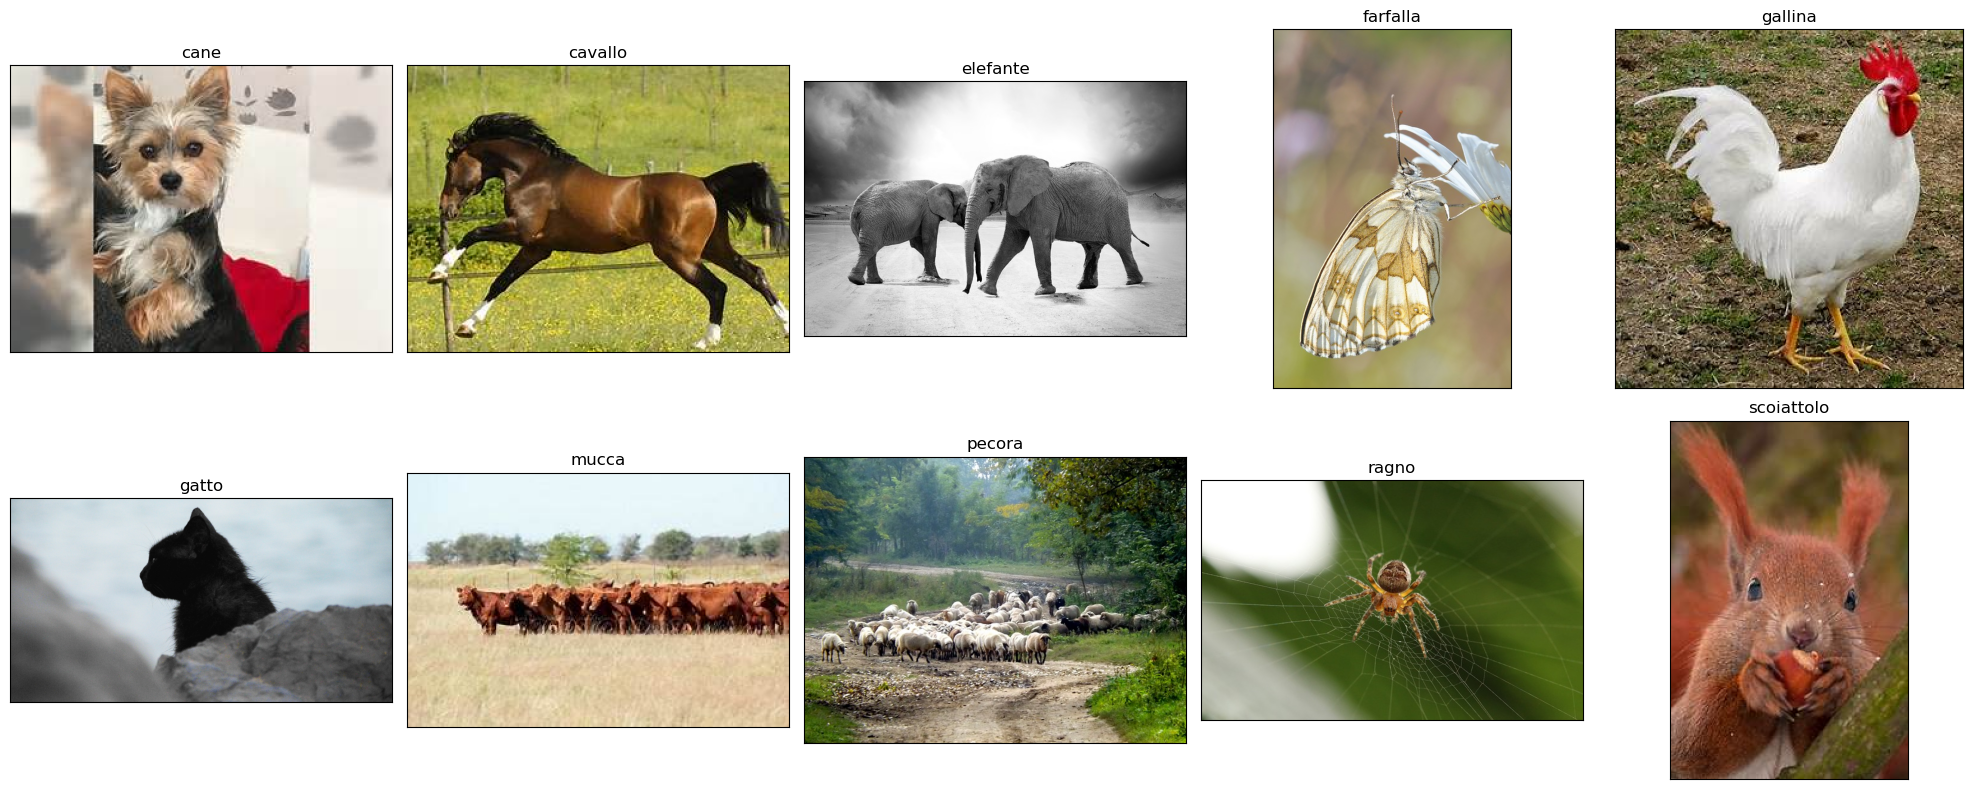

In [4]:
from PIL import Image

# Plot the first image of each animal (with italian names)
# Get the first image filepath for each animal
first_images = image_df_italian.groupby('Label').first().reset_index()

# Loop through each animal and display the first image
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img_path = first_images.Filepath.iloc[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(first_images.Label.iloc[i])
plt.tight_layout()
plt.show()

       Label                                           Filepath
0  butterfly  AnimalRecognition_Data\farfalla\e030b20928e900...
1        cat  AnimalRecognition_Data\gatto\abdu-rahman-2934-...
2    chicken             AnimalRecognition_Data\gallina\10.jpeg
3        cow  AnimalRecognition_Data\mucca\OIP---lAIbDlHKmej...
4        dog  AnimalRecognition_Data\cane\OIF-e2bexWrojgtQnA...
5   elephant  AnimalRecognition_Data\elefante\e032b10b2df21c...
6      horse  AnimalRecognition_Data\cavallo\OIP---MGqQIhmz3...
7      sheep  AnimalRecognition_Data\pecora\e032b5082ef61c22...
8     spider  AnimalRecognition_Data\ragno\e034b90b20f11c22d...
9   squirrel  AnimalRecognition_Data\scoiattolo\OIP--0Yr2a_y...


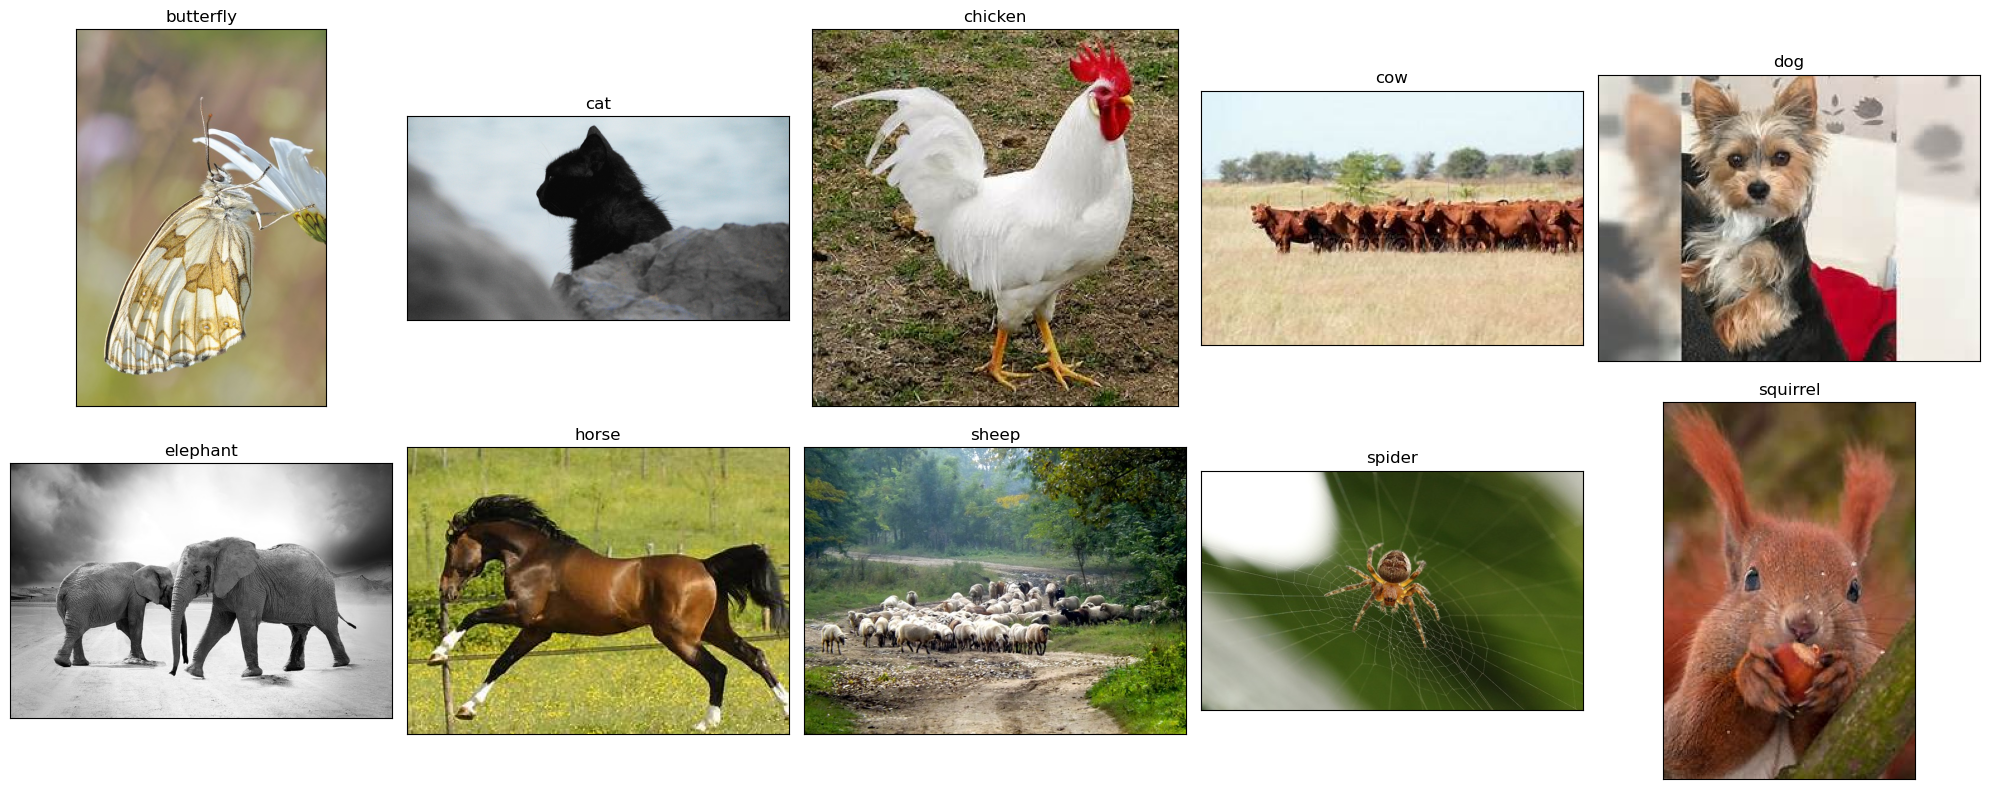

In [5]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno":"spider"}

# Plot the first image of each animal (with english names)
# Translate the labels in the dataframe
image_df = convert_path_to_df(dataset)
image_df['Label'] = image_df['Label'].map(translate)
first_images['Label'] = first_images['Label'].map(translate)

# Get the first image filepath for each animal
first_images = image_df.groupby('Label').first().reset_index()
print(first_images)

# Loop through each animal and display the first image
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img_path = first_images.Filepath.iloc[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(first_images.Label.iloc[i])
plt.tight_layout()
plt.show()

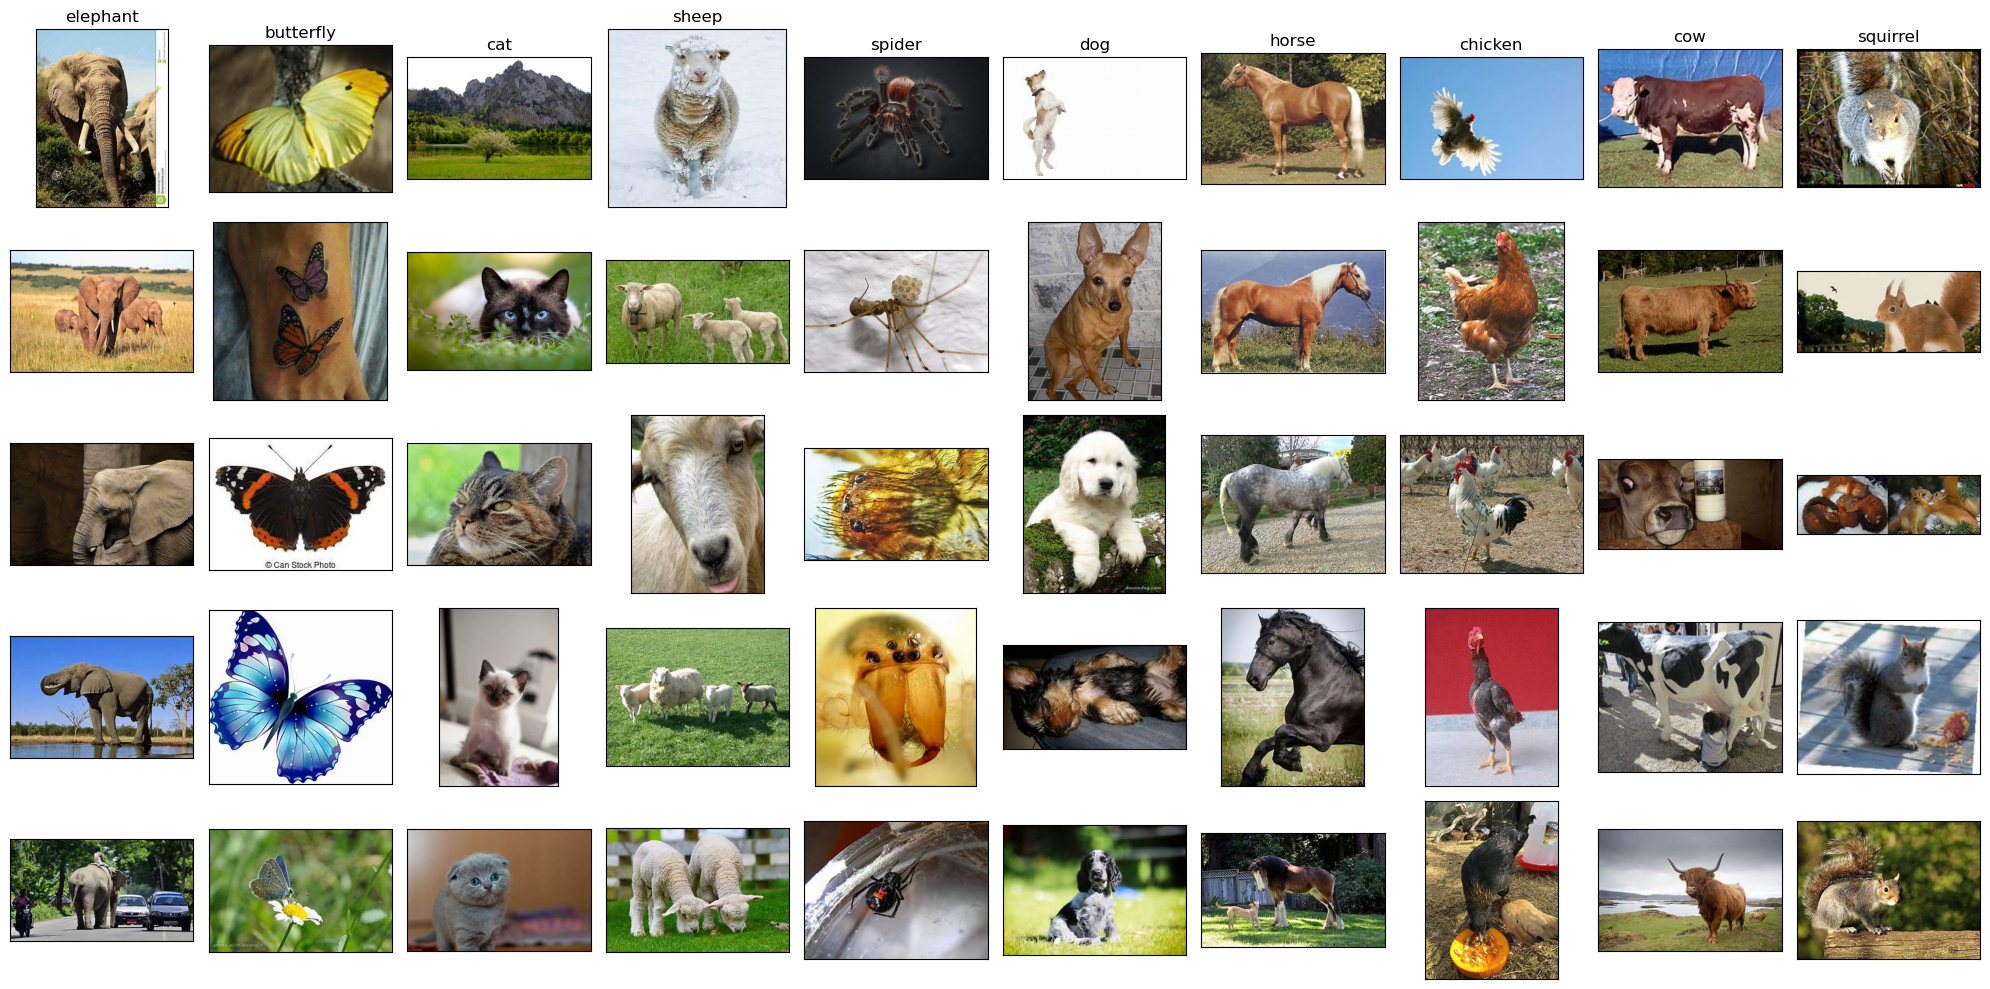

In [6]:
# Display 50 pictures of the dataset with their labels, ensuring the same animal for each column
unique_labels = image_df['Label'].unique()
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(20, 10), subplot_kw={'xticks': [], 'yticks': []})

for col, label in enumerate(unique_labels[:10]):
    label_images = image_df[image_df['Label'] == label].sample(5)
    for row, (idx, img_row) in enumerate(label_images.iterrows()):
        ax = axes[row, col]
        img = plt.imread(img_row['Filepath'])
        ax.imshow(img)
        if row == 0:
            ax.set_title(label)
plt.tight_layout()
plt.show()

# 2. Prepare and Analyze Data

In [7]:
# From Kaggle helper functions:
# Walk through an image classification directory and find out how many files (images) are in each subdirectory.
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(dataset)

There are 10 directories and 0 images in './AnimalRecognition_Data'.
There are 0 directories and 4863 images in './AnimalRecognition_Data\cane'.
There are 0 directories and 2623 images in './AnimalRecognition_Data\cavallo'.
There are 0 directories and 1446 images in './AnimalRecognition_Data\elefante'.
There are 0 directories and 2112 images in './AnimalRecognition_Data\farfalla'.
There are 0 directories and 3098 images in './AnimalRecognition_Data\gallina'.
There are 0 directories and 1668 images in './AnimalRecognition_Data\gatto'.
There are 0 directories and 1866 images in './AnimalRecognition_Data\mucca'.
There are 0 directories and 1820 images in './AnimalRecognition_Data\pecora'.
There are 0 directories and 4821 images in './AnimalRecognition_Data\ragno'.
There are 0 directories and 1862 images in './AnimalRecognition_Data\scoiattolo'.


In [8]:
# Check for corrupted images within the dataset
import PIL
from PIL import UnidentifiedImageError

path = Path(dataset).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

Label
spider       5143
dog          4863
chicken      3098
horse        2623
butterfly    2534
sheep        2196
cat          2108
cow          1866
squirrel     1862
elephant     1805
Name: count, dtype: int64


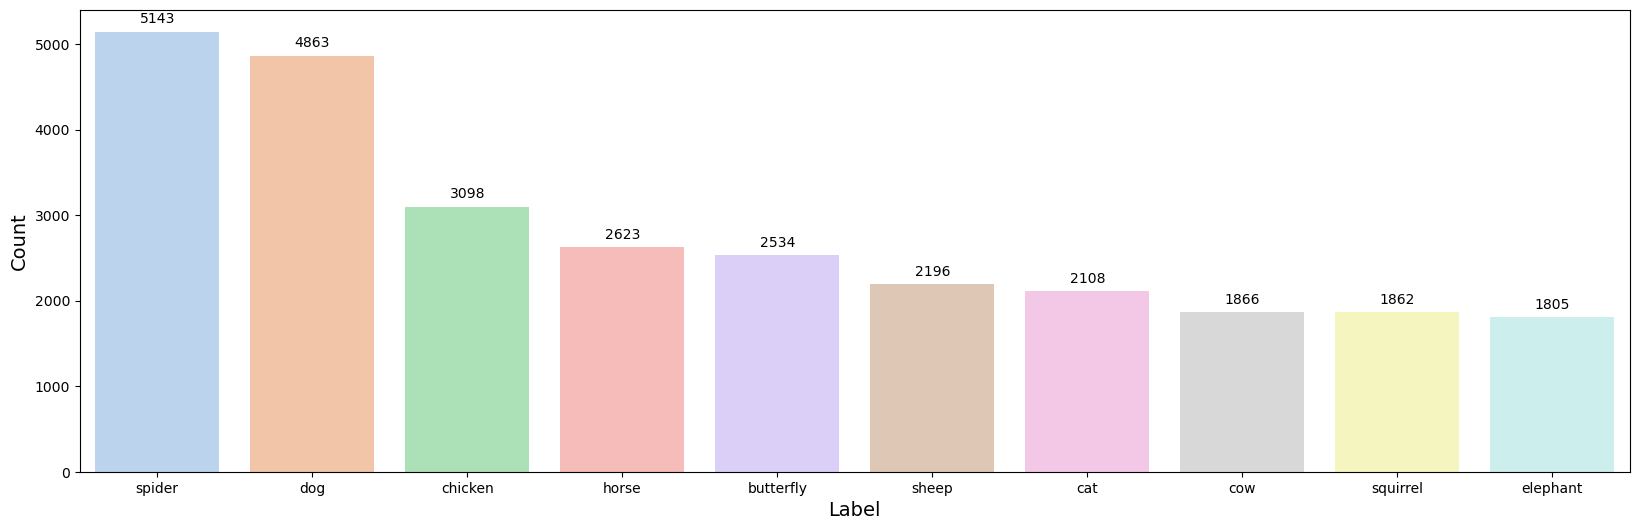

In [9]:
# Get the value counts for each label
label_counts = image_df['Label'].value_counts()
print(label_counts)

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

# Plot the bar chart
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, alpha=0.8, palette='pastel', ax=axes, legend=False)
# axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)

# Add count labels on top of the bars
for p in axes.patches:
    axes.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points')

# Display the plot
plt.show()